# **Mistral for sentiment analysis, category classification and keyword extrction**

## To run use google colab



In [1]:
%%capture
!pip install --upgrade git+https://github.com/UKPLab/sentence-transformers
!pip install keybert ctransformers[cuda]
!pip install --upgrade git+https://github.com/huggingface/transformers



<br>
<div>
<img src="https://github.com/MaartenGr/KeyBERT/assets/25746895/aba167b1-93e6-44ab-a39b-4aab85c858c0" width="850"/>
</div>


In [2]:
from ctransformers import AutoModelForCausalLM

# Set gpu_layers to the number of layers to offload to GPU. Set to 0 if no GPU acceleration is available on your system.
model = AutoModelForCausalLM.from_pretrained(
    "TheBloke/Mistral-7B-Instruct-v0.1-GGUF",
    model_file="mistral-7b-instruct-v0.1.Q4_K_M.gguf",
    model_type="mistral",
    gpu_layers=50,
    hf=True
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

mistral-7b-instruct-v0.1.Q4_K_M.gguf:   0%|          | 0.00/4.37G [00:00<?, ?B/s]

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
from transformers import AutoTokenizer, pipeline

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.1")

# Pipeline for sentiment and category
generator = pipeline(
    model=model, tokenizer=tokenizer,
    task='text-generation',
    max_new_tokens=20,
    do_sample=True,
    temperature=0.1
)

# Pipeline for keyword
generator_key = pipeline(
    model=model, tokenizer=tokenizer,
    task='text-generation',
    max_new_tokens=50,
    repetition_penalty=1.1
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

# Booking data

In [4]:
!pip install pandas langdetect googletrans

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 9.9 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=4d03e1f153df48bd29dc6f32754652d1e6c76bef8af0b4fb191ccf84ecae84f3
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
  Create

In [5]:
import pandas as pd
import json
import string
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect
from googletrans import Translator
from datetime import datetime

In [6]:
hotel_reviews_path = 'd1fe8412-b9cb-46b9-ab5b-b5116e3fa965_The Social Hub Groningen_17-12-2023_19-11.csv'

hotel_reviews_data = pd.read_csv(hotel_reviews_path)
hotel_reviews_data.head()

,review_title,review_date,reviewer_country,room_type,party_size,nr_nights,date_stay,review_score,review_great,review_poor,hotel_response_bool
0,Exceptional,08-2022,Turkey,Deluxe King Room,Solo traveller,1,08-2022,10.0,Everything was perfect. + shower gel and soap ...,NaN,False
1,"Great place, great staff, great breakfast",12-2023,United States,Deluxe King Room,Solo traveller,3,12-2023,8.0,"Good vibe, young, modern, easy",NaN,True
2,Good place to stay.,11-2023,United States,Deluxe King Room,Couple,3,11-2023,8.0,The hotel was nice and had good amenities. Sta...,The arrangements for the laundry were challeng...,True
3,Good,08-2023,Germany,Standard Queen Room,Couple,6,08-2023,7.0,Very friendly staff and good location.,Very simple and not completely cleaned room.,True
4,I would come back :),10-2023,Germany,Standard Queen Room,Solo traveller,1,10-2023,8.0,"The location is great, good atmosphere with ma...","Staff was friendly, but not always where I exp...",True


In [7]:
def is_english(text):
    try:
        lang = detect(text)
        return lang == 'en'
    except:
        return False

def translate_to_english(text):
    translator = Translator()
    try:
        if not is_english(text):

            translation = translator.translate(text, dest='en')
            return translation.text
    except:
        pass
    return text

hotel_reviews_data = hotel_reviews_data.drop_duplicates()

# hotel_reviews_data['review_title'] = hotel_reviews_data['review_title'].apply(translate_to_english)
# hotel_reviews_data['review_poor'] = hotel_reviews_data['review_poor'].apply(translate_to_english)
# hotel_reviews_data['review_great'] = hotel_reviews_data['review_great'].apply(translate_to_english)

hotel_reviews_data_english = hotel_reviews_data[hotel_reviews_data['review_poor'].apply(is_english) & hotel_reviews_data['review_great'].apply(is_english)]
hotel_reviews_data.loc[hotel_reviews_data['review_poor'].str.contains('nothing|nil|niks|Niets|-', case=False, na=False), 'review_poor'] = pd.NA

hotel_reviews_data

,review_title,review_date,reviewer_country,room_type,party_size,nr_nights,date_stay,review_score,review_great,review_poor,hotel_response_bool
0,Exceptional,08-2022,Turkey,Deluxe King Room,Solo traveller,1,08-2022,10.0,Everything was perfect. + shower gel and soap ...,NaN,False
1,"Great place, great staff, great breakfast",12-2023,United States,Deluxe King Room,Solo traveller,3,12-2023,8.0,"Good vibe, young, modern, easy",NaN,True
2,Good place to stay.,11-2023,United States,Deluxe King Room,Couple,3,11-2023,8.0,The hotel was nice and had good amenities. Sta...,The arrangements for the laundry were challeng...,True
3,Good,08-2023,Germany,Standard Queen Room,Couple,6,08-2023,7.0,Very friendly staff and good location.,Very simple and not completely cleaned room.,True
4,I would come back :),10-2023,Germany,Standard Queen Room,Solo traveller,1,10-2023,8.0,"The location is great, good atmosphere with ma...","Staff was friendly, but not always where I exp...",True
...,...,...,...,...,...,...,...,...,...,...,...
3305,Exceptional,03-2022,Netherlands,NaN,Couple,2,03-2022,10.0,NaN,NaN,False
3306,Exceptional,08-2021,Romania,NaN,Family,3,08-2021,10.0,NaN,NaN,False
3307,Okay,08-2021,Germany,NaN,Solo traveller,2,08-2021,5.8,NaN,NaN,False
3308,Exceptional,06-2021,Slovenia,NaN,Family,3,06-2021,10.0,NaN,NaN,False


In [8]:
df = hotel_reviews_data_english

non_empty_poor = df[df['review_poor'].notna() & (df['review_poor'] != '')]
non_empty_great = df[df['review_great'].notna() & (df['review_great'] != '')]

# Randomly sample 50 entries from each
sampled_poor = non_empty_poor.sample(50, random_state=42)  # Setting a random state for reproducibility
sampled_great = non_empty_great.sample(50, random_state=42)

# Add a true_label column
sampled_poor['true_label'] = 'negative'
sampled_great['true_label'] = 'positive'

# Concatenate the review text from both datasets
sampled_poor['review_text'] = sampled_poor['review_poor']
sampled_great['review_text'] = sampled_great['review_great']

# Combine the samples
combined_samples = pd.concat([sampled_poor, sampled_great])

# Create the final dataset with selected columns
reviews_small = combined_samples[['review_title', 'date_stay', 'review_text', 'true_label']]

reviews_small

,review_title,date_stay,review_text,true_label
127,we enjoyed our visit to the Student Hotel and ...,10-2021,water problem at the shower,negative
28,"The concept and the location are amazing, but ...",08-2023,"The beds are very uncomfortable, the pillows a...",negative
210,Pleasant,08-2022,After we saw the lobby we had high expectation...,negative
134,Good choice in Groningen,08-2021,Lack of elevators. Only one per building. And ...,negative
130,Excellent,08-2021,Breakfast in room attracted some expenses whic...,negative
...,...,...,...,...
138,Good location,08-2021,"The location was really good, also the overall...",positive
231,Excellent hotel with great staff!,01-2022,The room was very clean and there were some fr...,positive
240,Exceptional,08-2021,The hotel is just amazing! Every little detail...,positive
129,Very good,09-2021,Very close to centre of town and university,positive


# 📄 **Prompt Engineering**


In [9]:
def get_sentiment(review):
    # Format the prompt with the review
    example_prompt = f"""
    <s>[INST]
    Please analyze the sentiment of the following hotel review and classify it as either 'positive', 'negative', or 'neutral'. Provide only the sentiment label as the response.
    The staff were incredibly welcoming, and the room exceeded my expectations with its comfort and cleanliness.
    [/INST] positive

    [INST]
    Please analyze the sentiment of the following hotel review and classify it as either 'positive', 'negative', or 'neutral'. Provide only the sentiment label as the response.
    I was deeply disappointed with the unprofessional service and the noisy environment that disturbed my sleep.
    [/INST] negative

    [INST]
    Please analyze the sentiment of the following hotel review and classify it as either 'positive', 'negative', or 'neutral'. Provide only the sentiment label as the response.
    The hotel is located downtown, close to the subway station, and offers a standard continental breakfast.
    [/INST] neutral </s>
    """

    sentiment_prompt = f"""
    <s>[INST]
    Please analyze the sentiment of the following hotel review and classify it as either 'positive', 'negative', or 'neutral'. Provide only the sentiment label as the response.
    {review}
    [/INST]
    """

    prompt = example_prompt + sentiment_prompt
    # Generate the sentiment
    output = generator(prompt)
    sentiment = output[0]["generated_text"].splitlines()[-1]

    return sentiment

reviews_small['predicted_label'] = reviews_small['review_text'].apply(get_sentiment)

reviews_small

<ipython-input-9-1b1aa74a260d>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_small['predicted_label'] = reviews_small['review_text'].apply(get_sentiment)


,review_title,date_stay,review_text,true_label,predicted_label
127,we enjoyed our visit to the Student Hotel and ...,10-2021,water problem at the shower,negative,negative
28,"The concept and the location are amazing, but ...",08-2023,"The beds are very uncomfortable, the pillows a...",negative,negative
210,Pleasant,08-2022,After we saw the lobby we had high expectation...,negative,negative
134,Good choice in Groningen,08-2021,Lack of elevators. Only one per building. And ...,negative,negative
130,Excellent,08-2021,Breakfast in room attracted some expenses whic...,negative,negative
...,...,...,...,...,...
138,Good location,08-2021,"The location was really good, also the overall...",positive,positive
231,Excellent hotel with great staff!,01-2022,The room was very clean and there were some fr...,positive,positive
240,Exceptional,08-2021,The hotel is just amazing! Every little detail...,positive,positive
129,Very good,09-2021,Very close to centre of town and university,positive,neutral


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [10]:
def get_one_word_sentiment(output):
    output = output.translate(str.maketrans('', '', string.punctuation))
    new_output = output.split()
    if new_output:
        new_output = output.split()[-1]

    if new_output not in ['positive', 'negative', 'neutral']:
        new_output = 'neutral'

    return new_output

reviews_small_sen = reviews_small.copy()
reviews_small_sen['predicted_label'] = reviews_small_sen['predicted_label'].apply(get_one_word_sentiment)

reviews_small_sen

,review_title,date_stay,review_text,true_label,predicted_label
127,we enjoyed our visit to the Student Hotel and ...,10-2021,water problem at the shower,negative,negative
28,"The concept and the location are amazing, but ...",08-2023,"The beds are very uncomfortable, the pillows a...",negative,negative
210,Pleasant,08-2022,After we saw the lobby we had high expectation...,negative,negative
134,Good choice in Groningen,08-2021,Lack of elevators. Only one per building. And ...,negative,negative
130,Excellent,08-2021,Breakfast in room attracted some expenses whic...,negative,negative
...,...,...,...,...,...
138,Good location,08-2021,"The location was really good, also the overall...",positive,positive
231,Excellent hotel with great staff!,01-2022,The room was very clean and there were some fr...,positive,positive
240,Exceptional,08-2021,The hotel is just amazing! Every little detail...,positive,positive
129,Very good,09-2021,Very close to centre of town and university,positive,neutral


In [11]:
accuracy = (reviews_small_sen['true_label'] == reviews_small_sen['predicted_label']).sum() / len(reviews_small_sen)
print(f"Accuracy: {accuracy}")

neutral_count = (reviews_small_sen['predicted_label'] == 'neutral').sum()
print("Number of entries with 'neutral' as predicted label:", neutral_count)

Accuracy: 0.66
Number of entries with 'neutral' as predicted label: 33


# Category extraction
complaint, suggestion, compliment, sarcasm, question + observation

In [12]:
def get_category(review):

    example_prompt = f"""
    <s>[INST]
    Please analyse the following hotel review and choose one label which matches the best with the review from the possible labels: complaint, suggestion, compliment, sarcasm, question. Say only the label you chose and nothing else.
    The staff were incredibly welcoming, and the room exceeded my expectations with its comfort and cleanliness.
    [/INST] compliment </s>
    """

    category_prompt = f"""
    [INST]
    Please analyse the following hotel review and choose one label which matches the best with the review from the possible labels: complaint, suggestion, compliment, sarcasm, question. Say only the label you chose and nothing else.
    {review}
    [/INST]
    """

    prompt = example_prompt + category_prompt
    # Generate the category
    output = generator(prompt)
    category = output[0]["generated_text"]

    return category


reviews_small['predicted_category'] = reviews_small['review_text'].apply(get_category)

reviews_small

<ipython-input-12-beb6b65ebb79>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_small['predicted_category'] = reviews_small['review_text'].apply(get_category)


,review_title,date_stay,review_text,true_label,predicted_label,predicted_category
127,we enjoyed our visit to the Student Hotel and ...,10-2021,water problem at the shower,negative,negative,\n <s>[INST]\n Please analyse the follow...
28,"The concept and the location are amazing, but ...",08-2023,"The beds are very uncomfortable, the pillows a...",negative,negative,\n <s>[INST]\n Please analyse the follow...
210,Pleasant,08-2022,After we saw the lobby we had high expectation...,negative,negative,\n <s>[INST]\n Please analyse the follow...
134,Good choice in Groningen,08-2021,Lack of elevators. Only one per building. And ...,negative,negative,\n <s>[INST]\n Please analyse the follow...
130,Excellent,08-2021,Breakfast in room attracted some expenses whic...,negative,negative,\n <s>[INST]\n Please analyse the follow...
...,...,...,...,...,...,...
138,Good location,08-2021,"The location was really good, also the overall...",positive,positive,\n <s>[INST]\n Please analyse the follow...
231,Excellent hotel with great staff!,01-2022,The room was very clean and there were some fr...,positive,positive,\n <s>[INST]\n Please analyse the follow...
240,Exceptional,08-2021,The hotel is just amazing! Every little detail...,positive,positive,\n <s>[INST]\n Please analyse the follow...
129,Very good,09-2021,Very close to centre of town and university,positive,neutral,\n <s>[INST]\n Please analyse the follow...


In [13]:
def get_one_word_category(output):
    output = output.translate(str.maketrans('', '', string.punctuation))
    new_output = output.split()
    if new_output:
        new_output = output.split()[-1]

    if new_output not in ['complaint', 'suggestion', 'compliment', 'sarcasm', 'question']:
      new_output = 'observation'

    return new_output

reviews_small_cat = reviews_small.copy()
reviews_small_cat['predicted_category'] = reviews_small_cat['predicted_category'].apply(get_one_word_category)
reviews_small_cat['predicted_label'] = reviews_small_sen['predicted_label']

reviews_small_cat

,review_title,date_stay,review_text,true_label,predicted_label,predicted_category
127,we enjoyed our visit to the Student Hotel and ...,10-2021,water problem at the shower,negative,negative,complaint
28,"The concept and the location are amazing, but ...",08-2023,"The beds are very uncomfortable, the pillows a...",negative,negative,complaint
210,Pleasant,08-2022,After we saw the lobby we had high expectation...,negative,negative,complaint
134,Good choice in Groningen,08-2021,Lack of elevators. Only one per building. And ...,negative,negative,complaint
130,Excellent,08-2021,Breakfast in room attracted some expenses whic...,negative,negative,complaint
...,...,...,...,...,...,...
138,Good location,08-2021,"The location was really good, also the overall...",positive,positive,compliment
231,Excellent hotel with great staff!,01-2022,The room was very clean and there were some fr...,positive,positive,compliment
240,Exceptional,08-2021,The hotel is just amazing! Every little detail...,positive,positive,compliment
129,Very good,09-2021,Very close to centre of town and university,positive,neutral,suggestion


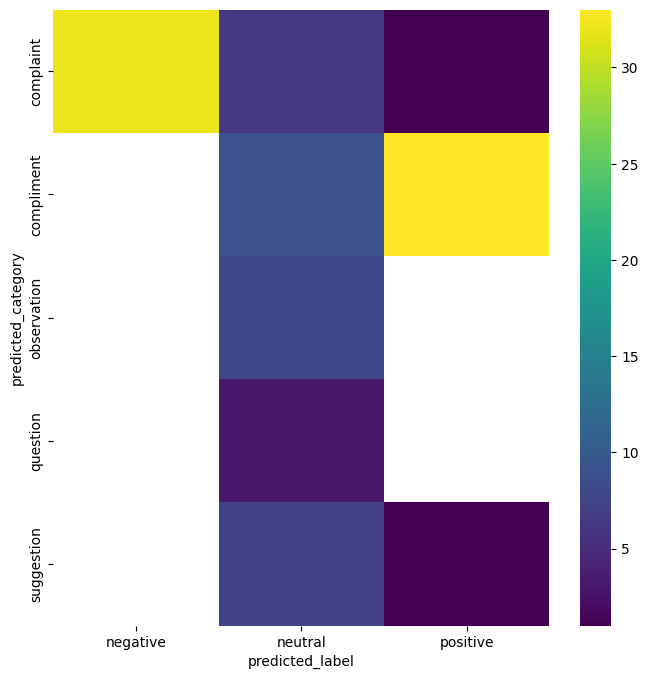

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['predicted_category'].value_counts()
    for x_label, grp in reviews_small_cat.groupby('predicted_label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('predicted_label')
_ = plt.ylabel('predicted_category')

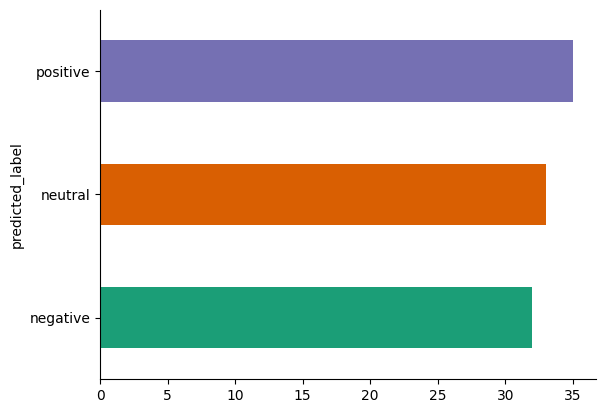

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
reviews_small_cat.groupby('predicted_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

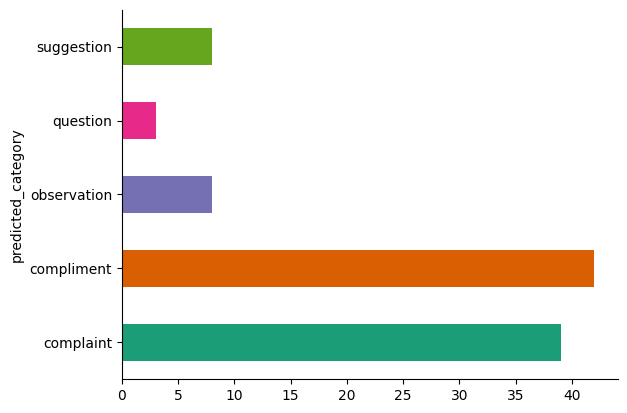

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
reviews_small_cat.groupby('predicted_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# 🗝️ Keyword Extraction with `KeyLLM`

Keyword extraction with vanilla `KeyLLM` couldn't be more straightforward; we simply ask it to extract keywords from a document.


In [31]:
from keybert.llm import TextGeneration
from keybert import KeyLLM
from keybert import KeyBERT

example_prompt = """
<s>[INST]
I have the following hotel review:
I was deeply disappointed with the unprofessional staff and the noisy environment that disturbed my sleep.

Please give me the keywords that are present in this review and separate them with commas.
Make sure you to only return the keywords and say nothing else. For example, don't say:
"Here are the keywords present in the review"
[/INST] deeply disappointed, unprofessional staff, noisy environment, disturbed my sleep</s>"""

keyword_prompt = """
[INST]

I have the following hotel review:
- [DOCUMENT]

Please give me the keywords that are present in this review and separate them with commas.
Make sure you to only return the keywords and say nothing else. For example, don't say:
"Here are the keywords present in the review"
[/INST]
"""

prompt = example_prompt + keyword_prompt
llm = TextGeneration(generator_key, prompt=prompt)
kw_model = KeyLLM(llm)

review1 = "The staff were incredibly welcoming, and the room exceeded my expectations with its comfort and cleanliness."
review2 = "orher peoples hairs in the bed, unclean shower and dirty towel on the floor upon arrival, not compensated therefore overpriced"
# keywords = kw_model.extract_keywords([review2])[0]; keywords


kw_model_bert = KeyBERT(llm)
kw_model_bert.extract_keywords([review2], stop_words='english', top_n=5)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


[('dirty', 0.4959), ('towel', 0.4934), ('shower', 0.4581), ('bed', 0.4519)]

In [33]:
from keybert.llm import TextGeneration
from keybert import KeyLLM
from keybert import KeyBERT

def get_keywords(review):
    # Format the prompt with the review
    example_prompt = """
    <s>[INST]
    I have the following hotel review:
    The staff were incredibly welcoming, and the room exceeded my expectations with its comfort and cleanliness.

    Please give me the keywords that are present in this review and separate them with commas.
    Make sure you to only return the keywords and say nothing else. For example, don't say:
    "Here are the keywords present in the review"
    [/INST] incredibly welcoming staff, room, comfort, cleanliness</s>"""

    keyword_prompt = """
    [INST]

    I have the following hotel review:
    - [DOCUMENT]

    Please give me the keywords that are present in this review and separate them with commas.
    Make sure you to only return the keywords and say nothing else. For example, don't say:
    "Here are the keywords present in the review"
    [/INST]
    """

    prompt = example_prompt + keyword_prompt
    llm = TextGeneration(generator_key, prompt=prompt)
    kw_model_bert = KeyBERT(llm)
    keywords = kw_model_bert.extract_keywords([review], stop_words='english', top_n=5)

    return keywords

reviews_small['predicted_keywords'] = reviews_small['review_text'].apply(get_keywords)

reviews_small

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public

,review_title,date_stay,review_text,true_label,predicted_label,predicted_category,predicted_keywords
127,we enjoyed our visit to the Student Hotel and ...,10-2021,water problem at the shower,negative,negative,\n <s>[INST]\n Please analyse the follow...,"[(shower, 0.7893), (water, 0.5449), (problem, ..."
28,"The concept and the location are amazing, but ...",08-2023,"The beds are very uncomfortable, the pillows a...",negative,negative,\n <s>[INST]\n Please analyse the follow...,"[(beds, 0.5938), (pillows, 0.4551), (uncomfort..."
210,Pleasant,08-2022,After we saw the lobby we had high expectation...,negative,negative,\n <s>[INST]\n Please analyse the follow...,"[(rooms, 0.5597), (hotel, 0.4911), (room, 0.44..."
134,Good choice in Groningen,08-2021,Lack of elevators. Only one per building. And ...,negative,negative,\n <s>[INST]\n Please analyse the follow...,"[(elevators, 0.4975), (virus, 0.4078), (lack, ..."
130,Excellent,08-2021,Breakfast in room attracted some expenses whic...,negative,negative,\n <s>[INST]\n Please analyse the follow...,"[(breakfast, 0.5658), (expenses, 0.4302), (roo..."
...,...,...,...,...,...,...,...
138,Good location,08-2021,"The location was really good, also the overall...",positive,positive,\n <s>[INST]\n Please analyse the follow...,"[(hotel, 0.6507), (great, 0.3493), (location, ..."
231,Excellent hotel with great staff!,01-2022,The room was very clean and there were some fr...,positive,positive,\n <s>[INST]\n Please analyse the follow...,"[(bed, 0.434), (hungover, 0.3587), (sleep, 0.3..."
240,Exceptional,08-2021,The hotel is just amazing! Every little detail...,positive,positive,\n <s>[INST]\n Please analyse the follow...,"[(hotel, 0.6989), (pillows, 0.3406), (amazing,..."
129,Very good,09-2021,Very close to centre of town and university,positive,neutral,\n <s>[INST]\n Please analyse the follow...,"[(town, 0.6184), (centre, 0.5883), (university..."


In [34]:
reviews_small_all = reviews_small_cat.copy()
reviews_small_all['predicted_keywords'] = reviews_small['predicted_keywords']
reviews_small_all

,review_title,date_stay,review_text,true_label,predicted_label,predicted_category,predicted_keywords
127,we enjoyed our visit to the Student Hotel and ...,10-2021,water problem at the shower,negative,negative,complaint,"[(shower, 0.7893), (water, 0.5449), (problem, ..."
28,"The concept and the location are amazing, but ...",08-2023,"The beds are very uncomfortable, the pillows a...",negative,negative,complaint,"[(beds, 0.5938), (pillows, 0.4551), (uncomfort..."
210,Pleasant,08-2022,After we saw the lobby we had high expectation...,negative,negative,complaint,"[(rooms, 0.5597), (hotel, 0.4911), (room, 0.44..."
134,Good choice in Groningen,08-2021,Lack of elevators. Only one per building. And ...,negative,negative,complaint,"[(elevators, 0.4975), (virus, 0.4078), (lack, ..."
130,Excellent,08-2021,Breakfast in room attracted some expenses whic...,negative,negative,complaint,"[(breakfast, 0.5658), (expenses, 0.4302), (roo..."
...,...,...,...,...,...,...,...
138,Good location,08-2021,"The location was really good, also the overall...",positive,positive,compliment,"[(hotel, 0.6507), (great, 0.3493), (location, ..."
231,Excellent hotel with great staff!,01-2022,The room was very clean and there were some fr...,positive,positive,compliment,"[(bed, 0.434), (hungover, 0.3587), (sleep, 0.3..."
240,Exceptional,08-2021,The hotel is just amazing! Every little detail...,positive,positive,compliment,"[(hotel, 0.6989), (pillows, 0.3406), (amazing,..."
129,Very good,09-2021,Very close to centre of town and university,positive,neutral,suggestion,"[(town, 0.6184), (centre, 0.5883), (university..."


In [35]:
reviews_small_all.to_csv('reviews_small_all.csv', index=False)

# Opinion mining - TO DO

In [ ]:

def summarize_opinions_about_keyword(df, keyword):
    # Filter reviews containing the keyword
    filtered_reviews = df[df['keywords'].apply(lambda x: keyword in x)]

    # Initialize a dictionary to hold summaries for each sentiment and category
    summaries = {}

    # Iterate over each sentiment and category combination
    for sentiment in ['positive', 'negative', 'neutral']:
        for category in ['complaint', 'compliment', 'suggestion', 'question', 'observation']:
            # Filter reviews for the specific sentiment and category
            specific_reviews = filtered_reviews[(filtered_reviews['sentiment'] == sentiment) &
                                                (filtered_reviews['category'] == category)]

            # Join the reviews into a single text
            reviews_text = ' '.join(specific_reviews['review'].tolist())

            # Generate summary for these reviews
            if reviews_text:
                prompt = f"Summarize the main reasons for {sentiment} opinions about {keyword} in these {category} reviews: {reviews_text}"
                summaries[f"{sentiment}_{category}"] = generate_summary(prompt)

    return summaries

# Example usage
keyword = 'staff'
opinion_summaries = summarize_opinions_about_keyword(df, keyword)

# Print summaries
for key, summary in opinion_summaries.items()